<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-26 10:26:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  58.4MB/s    in 3.4s    

2025-03-26 10:26:31 (59.2 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 159.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 136.3 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 134.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 158.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 149.3 MB/s eta 0:00:00


In [3]:
!pip install numpy

In [4]:
!pip install seaborn

In [5]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [14]:
# your code goes here
QUERY = """
SELECT CompTotal
FROM main 
WHERE CompTotal IS NOT NULL
"""
df_CompTotal = pd.read_sql_query(QUERY, conn)

# Convert to numeric
df_CompTotal["CompTotal"] = pd.to_numeric(df_CompTotal["CompTotal"], errors="coerce")

# Remove extreme outliers (top 1%)
q99 = df_CompTotal["CompTotal"].quantile(0.99)
df_filtered = df_CompTotal[df_CompTotal["CompTotal"] < q99]

# Apply log transformation
df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])
df_filtered

/tmp/ipykernel_300/2944845662.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])


,CompTotal,LogCompTotal
0,2040000.0,14.528461
1,28000.0,10.239996
2,85000.0,11.350418
3,50000.0,10.819798
4,110000.0,11.608245
...,...,...
33735,36000.0,10.491302
33736,40000.0,10.596660
33737,61000.0,11.018646
33738,58000.0,10.968216


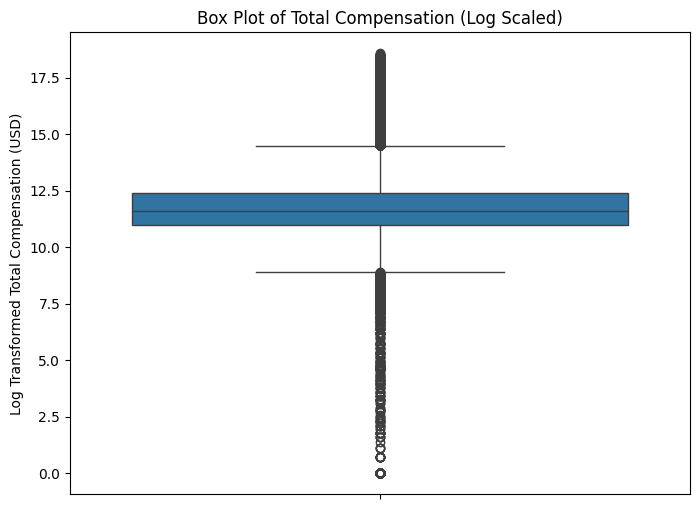

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, y="LogCompTotal")

plt.ylabel("Log Transformed Total Compensation (USD)")
plt.title("Box Plot of Total Compensation (Log Scaled)")

plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [16]:
# your code goes here
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL;
"""
df_Age = pd.read_sql_query(QUERY, conn)

In [17]:
# map age column
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

df_Age["AgeNumeric"] = df_Age["Age"].map(age_mapping)

df_Age_filtered = df_Age.dropna(subset=["AgeNumeric"])

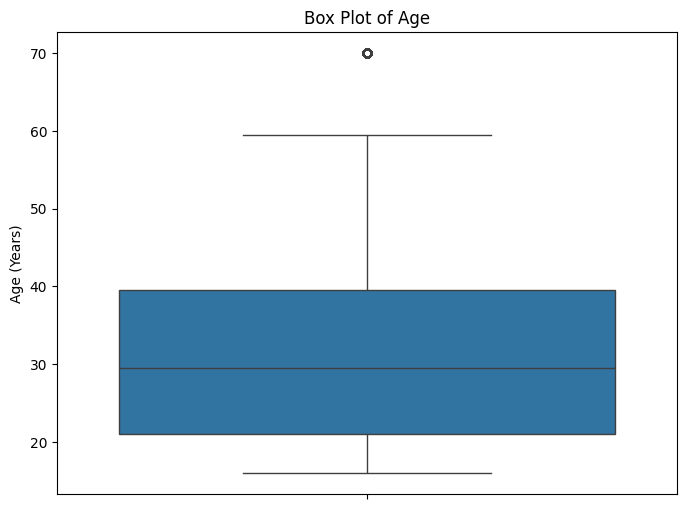

In [18]:
# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_Age_filtered, y="AgeNumeric")

plt.ylabel("Age (Years)")
plt.title("Box Plot of Age")

plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [19]:
# your code goes here
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)

In [22]:
# convert age to categories
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old",
    "35-44 years old", "45-54 years old", "55-64 years old",
    "65 years or older"
]
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

# convert to numeric
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal", "Age"])  # Ensure non-empty age groups
# Remove extreme outliers (top 1%)
q99 = df["CompTotal"].quantile(0.99)
df_filtered = df[df["CompTotal"] < q99]
# applying log function to comptotal
df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])
df_filtered

/tmp/ipykernel_300/985489431.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])


,Age,CompTotal,LogCompTotal
0,18-24 years old,2040000.0,14.528461
1,25-34 years old,28000.0,10.239996
2,35-44 years old,85000.0,11.350418
3,35-44 years old,50000.0,10.819798
4,25-34 years old,110000.0,11.608245
...,...,...,...
33735,18-24 years old,36000.0,10.491302
33736,25-34 years old,40000.0,10.596660
33737,25-34 years old,61000.0,11.018646
33738,35-44 years old,58000.0,10.968216


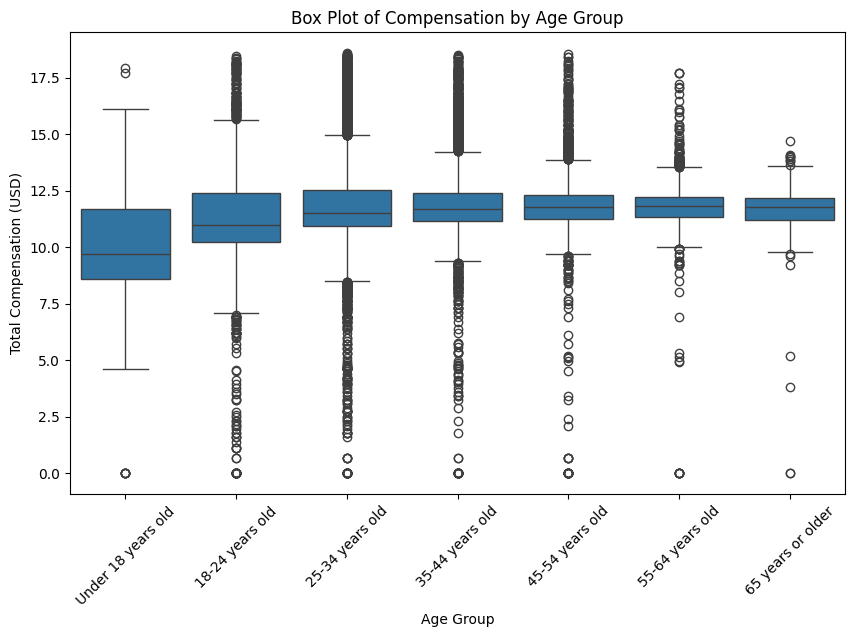

In [23]:
# boxplot of comptotal by age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x="Age", y="LogCompTotal")

plt.xlabel("Age Group")
plt.ylabel("Total Compensation (USD)")
plt.title("Box Plot of Compensation by Age Group")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [24]:
# your code goes here
QUERY = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)
df

,JobSatPoints_6,CompTotal
0,65.0,2040000.0
1,0.0,85000.0
2,20.0,110000.0
3,30.0,126420.0
4,30.0,195000.0
...,...,...
22473,20.0,40000.0
22474,50.0,46000.0
22475,20.0,81600.0
22476,0.0,500000.0


In [25]:
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
# Remove extreme outliers (top 1%)
q99 = df["CompTotal"].quantile(0.99)
df_filtered = df[df["CompTotal"] < q99]
# applying log function to comptotal
df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])
df_filtered

/tmp/ipykernel_300/1357786521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])


,JobSatPoints_6,CompTotal,LogCompTotal
0,65.0,2040000.0,14.528461
1,0.0,85000.0,11.350418
2,20.0,110000.0,11.608245
3,30.0,126420.0,11.747373
4,30.0,195000.0,12.180760
...,...,...,...
22473,20.0,40000.0,10.596660
22474,50.0,46000.0,10.736418
22475,20.0,81600.0,11.309597
22476,0.0,500000.0,13.122365


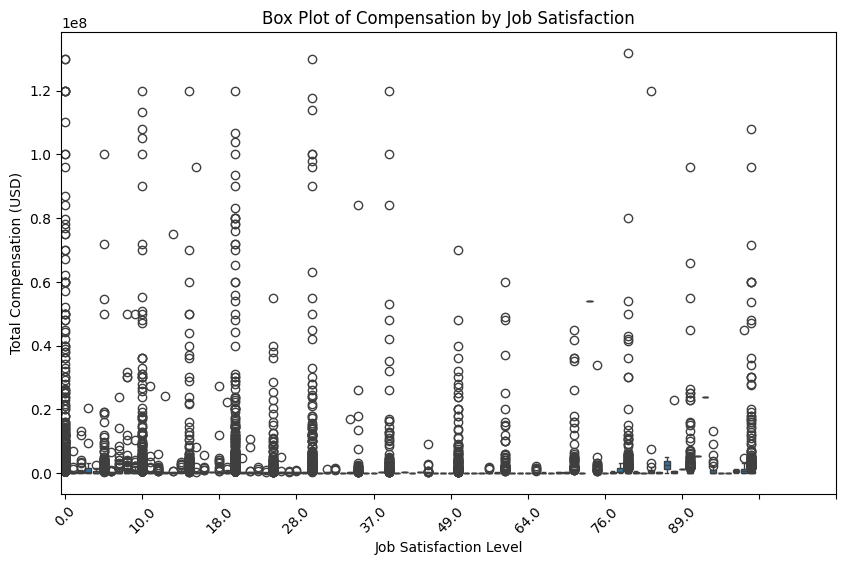

In [28]:
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(data=df_filtered, x="JobSatPoints_6", y="CompTotal")

# Set x-ticks to show only values at intervals of 10
tick_positions = np.arange(0, df_filtered["JobSatPoints_6"].max() + 1, 10)  # Adjust range dynamically
plt.xticks(tick_positions, rotation=45)  # Rotate labels for readability

# Labels and title
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Total Compensation (USD)")
plt.title("Box Plot of Compensation by Job Satisfaction")

plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [72]:
QUERY = """
WITH TopDevTypes AS (
    SELECT DevType
    FROM main
    WHERE DevType IS NOT NULL
    GROUP BY DevType
    ORDER BY COUNT(*) DESC
    LIMIT 5
)
SELECT m.DevType, m.ConvertedCompYearly
FROM main m
JOIN TopDevTypes t ON m.DevType = t.DevType
WHERE m.ConvertedCompYearly IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)
df

,DevType,ConvertedCompYearly
0,"Developer, full-stack",195000.0
1,"Developer, full-stack",44586.0
2,"Developer, full-stack",79481.0
3,"Developer, full-stack",66592.0
4,"Developer, full-stack",85925.0
...,...,...
15637,"Developer, desktop or enterprise applications",6030.0
15638,"Developer, desktop or enterprise applications",12921.0
15639,"Developer, desktop or enterprise applications",110000.0
15640,"Developer, desktop or enterprise applications",124000.0


In [73]:
# Remove extreme outliers (top 1%)
q99 = df["ConvertedCompYearly"].quantile(0.99)
df_filtered = df[df["ConvertedCompYearly"] < q99]
df_filtered["Log of ConvertedCompYearly"] = np.log1p(df_filtered["ConvertedCompYearly"])

/tmp/ipykernel_300/2552947981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Log of ConvertedCompYearly"] = np.log1p(df_filtered["ConvertedCompYearly"])


/tmp/ipykernel_300/1812545753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="DevType", y="Log of ConvertedCompYearly", palette="Set2")


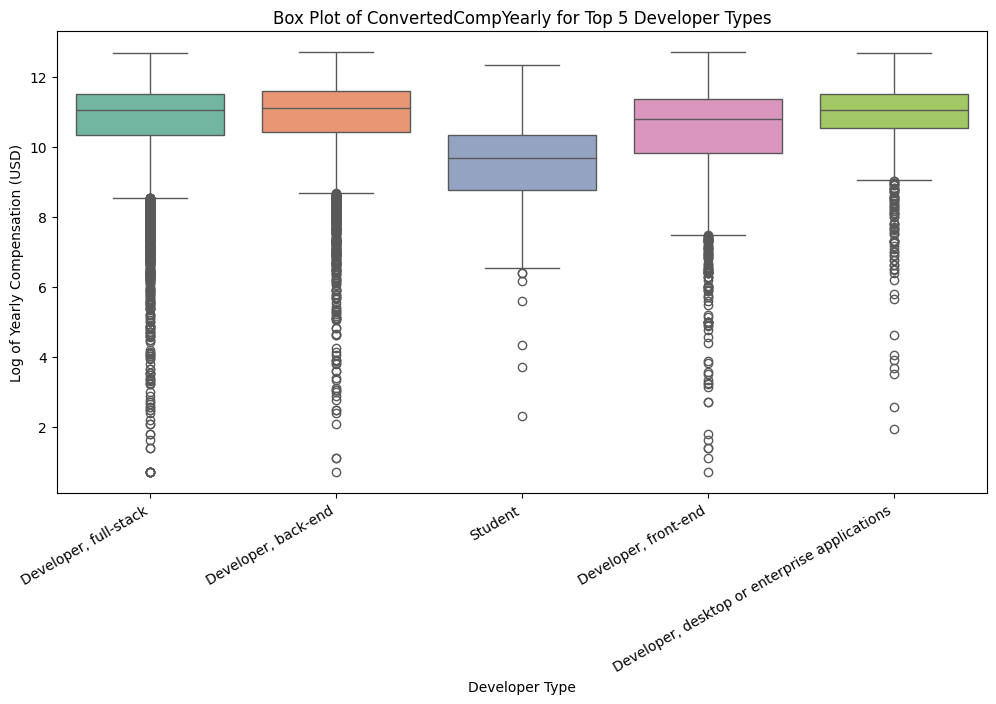

In [75]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x="DevType", y="Log of ConvertedCompYearly", palette="Set2")

# Formatting
plt.xticks(rotation=30, ha="right")
plt.xlabel("Developer Type")
plt.ylabel("Log of Yearly Compensation (USD)")
plt.title("Box Plot of ConvertedCompYearly for Top 5 Developer Types")

plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [45]:
# your code goes here
QUERY = """
SELECT Country, COUNT(*) AS Frequency
FROM main
WHERE Country IS NOT NULL
GROUP BY Country
ORDER BY Frequency DESC
LIMIT 5;
"""
pd.read_sql_query(QUERY, conn)

,Country,Frequency
0,United States of America,11095
1,Germany,4947
2,India,4231
3,United Kingdom of Great Britain and Northern I...,3224
4,Ukraine,2672


In [56]:
QUERY = """
WITH TopCountries AS (
    SELECT Country
    FROM main
    WHERE Country IS NOT NULL
    GROUP BY Country
    ORDER BY COUNT(*) DESC
    LIMIT 5
)
SELECT m.Country, m.CompTotal
FROM main m
JOIN TopCountries t ON m.Country = t.Country
WHERE m.CompTotal IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)

In [57]:
# Convert CompTotal to numeric
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

# Remove extreme outliers (top 1%)
q99 = df["CompTotal"].quantile(0.99)
df_filtered = df[df["CompTotal"] < q99]
# create log of comptotal
df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])


/tmp/ipykernel_300/158196347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])


/tmp/ipykernel_300/3254112617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="Country", y="LogCompTotal", palette="Set2")


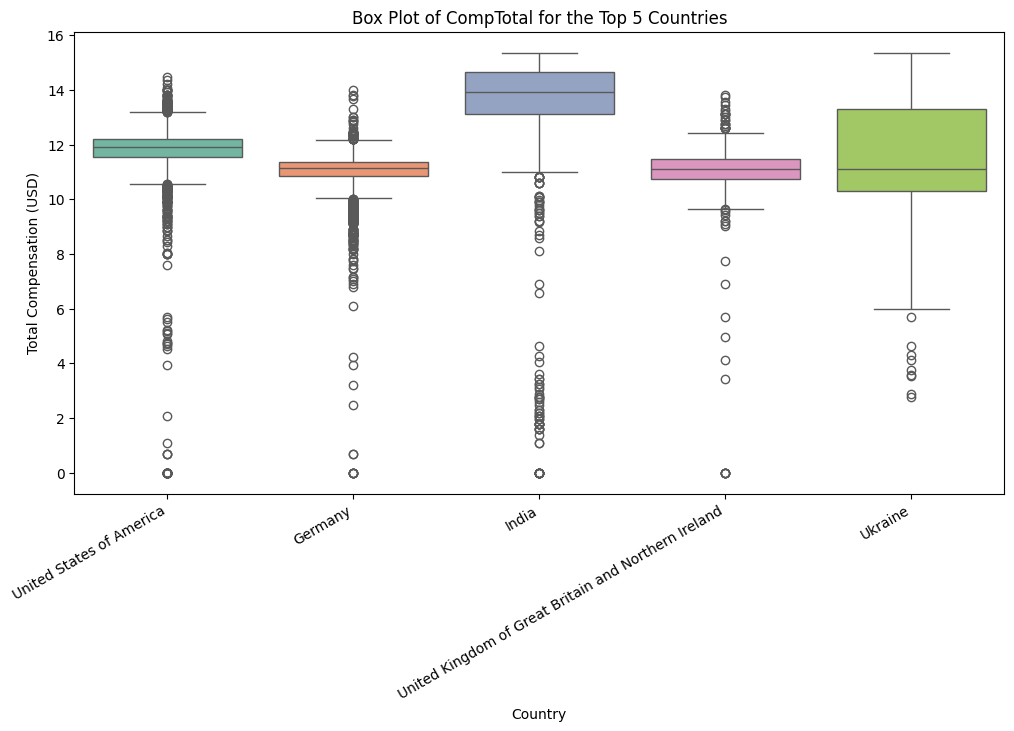

In [59]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x="Country", y="LogCompTotal", palette="Set2")

# Formatting
plt.xticks(rotation=30, ha="right")
plt.xlabel("Country")
plt.ylabel("Log of Total Compensation (USD)")
plt.title("Box Plot of CompTotal for the Top 5 Countries")

plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [64]:
# your code goes here
QUERY = """
SELECT Employment, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)

In [69]:
# Convert CompTotal to numeric
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

# Remove extreme outliers (top 1%)
q99 = df["CompTotal"].quantile(0.99)
df_filtered = df[df["CompTotal"] < q99]
# create log of comptotal
df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])

# **Split Employment into multiple rows**
df_exploded = df_filtered.assign(Employment=df_filtered["Employment"].str.split(";")).explode("Employment")

# Strip extra whitespace
df_exploded["Employment"] = df_exploded["Employment"].str.strip()

# Drop empty Employment values (if any)
df_exploded = df_exploded[df_exploded["Employment"] != ""]

/tmp/ipykernel_300/1695766417.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])


/tmp/ipykernel_300/2826257488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exploded, x="Employment", y="LogCompTotal", palette="Set2")


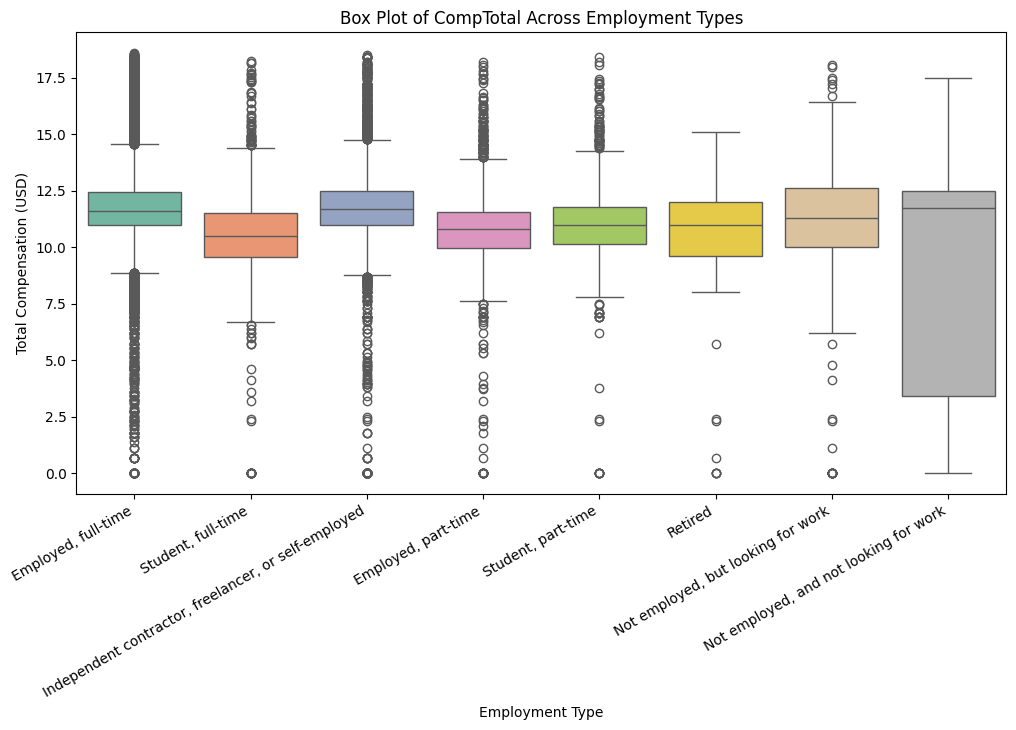

In [70]:
# Plot the Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_exploded, x="Employment", y="LogCompTotal", palette="Set2")

plt.xticks(rotation=30, ha="right")
plt.xlabel("Employment Type")
plt.ylabel("Log of Total Compensation (USD)")
plt.title("Box Plot of CompTotal Across Employment Types")
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [80]:
# your code goes here
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)

/tmp/ipykernel_300/2871995596.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="JobSatPoints_6", y="YearsCodePro", palette="Set2")
/tmp/ipykernel_300/2871995596.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(data=df, x="JobSatPoints_6", y="YearsCodePro", palette="Set2")


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

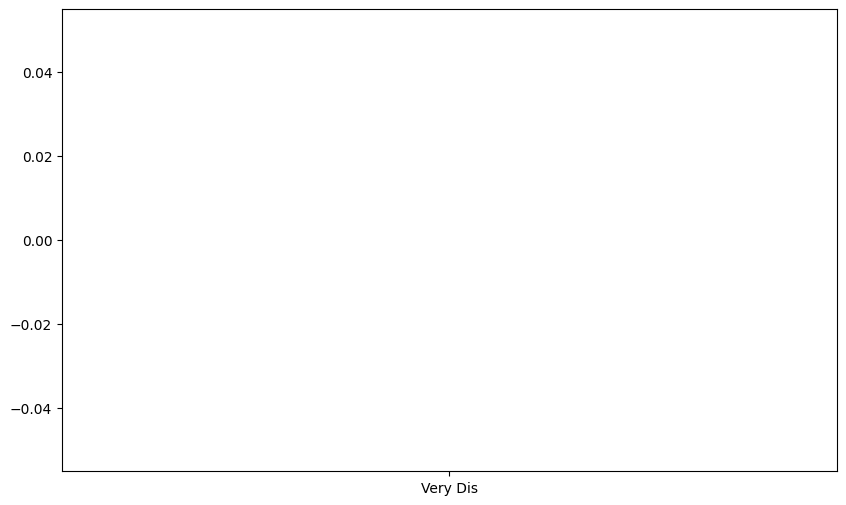

In [82]:
# Convert YearsCodePro to numeric
df["YearsCodePro"] = df["YearsCodePro"].replace({
    "Less than 1 year": 0.5,
    "More than 50 years": 51
}).astype(float)


# Drop NaN values
df = df.dropna(subset=["YearsCodePro", "JobSatPoints_6"])

# Optional: Shorten long JobSat labels (if necessary)
job_sat_mapping = {
    "Very satisfied": "Very Sat",
    "Slightly satisfied": "Slightly Sat",
    "Neither satisfied nor dissatisfied": "Neutral",
    "Slightly dissatisfied": "Slightly Dis",
    "Very dissatisfied": "Very Dis"
}
df["JobSatPoints_6"] = df["JobSatPoints_6"].replace(job_sat_mapping)

# Sort the satisfaction levels in a meaningful order
custom_order = ["Very Dis", "Slightly Dis", "Neutral", "Slightly Sat", "Very Sat"]
df["JobSatPoints_6"] = pd.Categorical(df["JobSatPoints_6"], categories=custom_order, ordered=True)

# Plot the Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="JobSatPoints_6", y="YearsCodePro", palette="Set2")

plt.xlabel("Job Satisfaction")
plt.ylabel("Years of Professional Coding Experience")
plt.title("Box Plot of YearsCodePro by Job Satisfaction")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
